In [27]:
pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import wandb

#MLOps
#https://wandb.ai/gazua/lstmGazua

In [30]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [31]:
import numpy as np
import pandas as pd

# 파이토치 라이브러리 호출
import torch 
import matplotlib.pyplot as plt 

import torchvision 
import torchvision.transforms as transforms 

import torch.nn as nn 
import torch.optim as optim

#
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

import datetime

from torch.autograd import Variable 

from torch.utils.data import Dataset, DataLoader

In [32]:
#데이터 불러오기

import pyupbit
from pyupbit.quotation_api import get_tickers

ETH_price = pyupbit.get_current_price("KRW-ETH")

df_ETH = pyupbit.get_ohlcv("KRW-ETH","hour",1581, to = '20220501')
#220501까지 1581일
#pyupbit.get_ohlcv로 받으면 open, high, low, close, volume거래량, value가 기본으로 있는건지? ->맞는듯

print(df_ETH)

                          open       high        low      close  \
2018-01-01 09:00:00  1028000.0  1076000.0  1011500.0  1057000.0   
2018-01-02 09:00:00  1056500.0  1270500.0  1051000.0  1177000.0   
2018-01-03 09:00:00  1177000.0  1324500.0  1157500.0  1295500.0   
2018-01-04 09:00:00  1295500.0  1518000.0  1269000.0  1439500.0   
2018-01-05 09:00:00  1439500.0  1645000.0  1406500.0  1554500.0   
...                        ...        ...        ...        ...   
2022-04-26 09:00:00  3766000.0  3799000.0  3553000.0  3596000.0   
2022-04-27 09:00:00  3597000.0  3702000.0  3580000.0  3677000.0   
2022-04-28 09:00:00  3677000.0  3786000.0  3646000.0  3737000.0   
2022-04-29 09:00:00  3737000.0  3753000.0  3603000.0  3628000.0   
2022-04-30 09:00:00  3630000.0  3656000.0  3564000.0  3570000.0   

                            volume         value  
2018-01-01 09:00:00   51315.571156  5.381793e+10  
2018-01-02 09:00:00  158481.289301  1.886397e+11  
2018-01-03 09:00:00   83430.944304  1.0099

In [33]:
df_ETH = df_ETH.drop("value",axis=1)
#value는 학습에 쓰는 일이 없어서 먼저 제외

df_ETH = df_ETH.drop(columns='volume')
#이렇게도 삭제 가능

print(df_ETH)

                          open       high        low      close
2018-01-01 09:00:00  1028000.0  1076000.0  1011500.0  1057000.0
2018-01-02 09:00:00  1056500.0  1270500.0  1051000.0  1177000.0
2018-01-03 09:00:00  1177000.0  1324500.0  1157500.0  1295500.0
2018-01-04 09:00:00  1295500.0  1518000.0  1269000.0  1439500.0
2018-01-05 09:00:00  1439500.0  1645000.0  1406500.0  1554500.0
...                        ...        ...        ...        ...
2022-04-26 09:00:00  3766000.0  3799000.0  3553000.0  3596000.0
2022-04-27 09:00:00  3597000.0  3702000.0  3580000.0  3677000.0
2022-04-28 09:00:00  3677000.0  3786000.0  3646000.0  3737000.0
2022-04-29 09:00:00  3737000.0  3753000.0  3603000.0  3628000.0
2022-04-30 09:00:00  3630000.0  3656000.0  3564000.0  3570000.0

[1581 rows x 4 columns]


In [34]:
print(df_ETH.dtypes)

open     float64
high     float64
low      float64
close    float64
dtype: object


In [35]:
#결측치 확인
df_ETH.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [36]:
X = df_ETH
y = df_ETH.iloc[:, 3:4]
#Pandas : iloc[] 를 활용한 인덱싱

print(X)
print(y)

                          open       high        low      close
2018-01-01 09:00:00  1028000.0  1076000.0  1011500.0  1057000.0
2018-01-02 09:00:00  1056500.0  1270500.0  1051000.0  1177000.0
2018-01-03 09:00:00  1177000.0  1324500.0  1157500.0  1295500.0
2018-01-04 09:00:00  1295500.0  1518000.0  1269000.0  1439500.0
2018-01-05 09:00:00  1439500.0  1645000.0  1406500.0  1554500.0
...                        ...        ...        ...        ...
2022-04-26 09:00:00  3766000.0  3799000.0  3553000.0  3596000.0
2022-04-27 09:00:00  3597000.0  3702000.0  3580000.0  3677000.0
2022-04-28 09:00:00  3677000.0  3786000.0  3646000.0  3737000.0
2022-04-29 09:00:00  3737000.0  3753000.0  3603000.0  3628000.0
2022-04-30 09:00:00  3630000.0  3656000.0  3564000.0  3570000.0

[1581 rows x 4 columns]
                         close
2018-01-01 09:00:00  1057000.0
2018-01-02 09:00:00  1177000.0
2018-01-03 09:00:00  1295500.0
2018-01-04 09:00:00  1439500.0
2018-01-05 09:00:00  1554500.0
...                  

In [37]:
#데이터 정규화
"""
학습이 잘되기 위해 데이터 정규화 
StandardScaler	각 특징의 평균을 0, 분산을 1이 되도록 변경
MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 변경
"""

#결과 예측할것에 minmax 쓰는건 대부분 다 똑같아보이는데
# StandardScaler 사용에 대해서는 생각해봐야할듯하네요
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mmsc = MinMaxScaler()
stdsc = StandardScaler()

X_std = stdsc.fit_transform(X)
#X_std = mmsc.fit_transform(X)
y_mm = mmsc.fit_transform(y) 

#SEQUECNE TO SEQUENCE 예제에서 대부분 잘못 알고 계시는것이, Y데이터를 정규화 하고 있다는 것입니다.
#이렇게 된다면 해당 NETWORK는 훈련 검증 테스트 셋에서만 유용한 모델이 되어 버립니다. 
#실제로 우리가 예측하고자 하는 것은 모르는 값일텐데 YEST를 정규화 해버리면 
#이를 DENORMALIZATION해주기 위해 평균과 분산을 훈련셋에서 알아내야 됩니다. 
#그런데 우리가 알고자 하는건 이미 훈련은 다 마친 NETWORK로 YTEST를 예측하기를 원하는 것이죠, 
#그런데 YTEST에 사용될 평균과 표준편차 또는 민맥스 값을 어떻게 알수 있을가요?? 전혀 알수가없겠죠. 
#따라서 수치형 데이터를 이용해 network를 구성함에 있어서 Y데이터를 정규화 하는것은 잘못된 방법입니다. 
#간혹 Y데이터를 정규화하는 예제가 있지만 이는 학습률을 매우 좋게 하기위한 트릭이지 잘못된 방법입니다. 
#추가로 범주형 데이터에서는 정규화에 대한 걱정도 하지 않겠지요 인코딩이라는 좋은 방법이 있기 때문에 
#결론적으로 Y데이터에는 어떠한 정규화도 해서는 안됩니다.

In [38]:
# Train Data
X_train = X_std[:1200, :] #훈련 데이터셋
X_test = X_std[1200:, :] #테스트 데이터셋

# Test Data 
y_train = y_mm[:1200, :]
y_test = y_mm[1200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 


#결과
#Training Shape (1200, 4) (1200, 1)
#Testing Shape (381, 4) (381, 1)

Training Shape (1200, 4) (1200, 1)
Testing Shape (381, 4) (381, 1)


In [39]:
#학습할 수 있는 형태로 변환하기 위해 Torch로 변환

"""
torch Variable에는 3개의 형태가 있다. 
data, grad, grad_fn 한 번 구글에 찾아서 공부해보기
"""

X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

#결과
#Training Shape torch.Size([1200, 1, 4]) torch.Size([1200, 1])
#Testing Shape torch.Size([381, 1, 4]) torch.Size([381, 1])

Training Shape torch.Size([1200, 1, 4]) torch.Size([1200, 1])
Testing Shape torch.Size([381, 1, 4]) torch.Size([381, 1])


In [40]:
#GPU 준비하기

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # device
#cuda = True if torch.cuda.is_available() else False

#Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [ ]:
#print(torch.cuda.get_device_name(0)

In [41]:
!nvidia-smi

Wed Jul 27 16:21:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |   1060MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Tesla T4

In [44]:
#LSTM 네트워크 구성하기
#딥러닝 책 742
#배치 정규화가 적용되지 않은 모델 

class LSTM1(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM1, self).__init__()
    self.num_classes = num_classes #number of classes #클래스 개수
    self.num_layers = num_layers #number of layers #LSTM 계층의 개수
    self.input_size = input_size #input size #입력 크기로 룬련 데이터셋의 칼럼 개수를 의미
    self.hidden_size = hidden_size #hidden state #은닉층의 뉴런 개수
    self.seq_length = seq_length #sequence length #시퀀스 길이
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm 계층
    self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1 #완전연결층
    self.fc = nn.Linear(128, num_classes) #fully connected last layer #출력층

    self.relu = nn.ReLU() 

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #은닉 상태를 0으로 초기화
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #셀 상태를 0으로 초기화
    # Propagate input through LSTM

    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state #LSTM 계층에 은식 상태와 셀 상태 적용
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next #완전연결층 적용을 위해 데이터의 형태 조정(1차원으로 조정)
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output

    return out 


In [45]:
#네트워크 파라미터 구성하기 

num_epochs = 16000 #에포크 수
learning_rate = 0.00001 #학습률 지정

input_size = 4 #number of features #수정하면서 하기 #입력 데이터셋의 칼럼(feature)개수
hidden_size = 100 #number of features in hidden state #은닉층의 뉴런/유닛 개수
num_layers = 1 #number of stacked lstm layers #LSTM 계층의 개수

num_classes = 1 #number of output classes #클래스 개수

# 각 수 조정에 대해 공부해보기

In [20]:
#wandb config setting
#wandb는 더 공부해보고 해야할듯
'''
config  = {
    'num_epochs': 16000,
    'learning_rate': 0.00001,
    'input_size': 4,
    'hidden_size': 100,
    'num_layers': 1,
    'num_classes': 1,
    'architecture': 'LSTM'
    }
'''

"\nconfig  = {\n    'num_epochs': 16000,\n    'learning_rate': 0.00001,\n    'input_size': 4,\n    'hidden_size': 100,\n    'num_layers': 1,\n    'num_classes': 1,\n    'architecture': 'LSTM'\n    }\n"

In [ ]:
#sweep_id = wandb.sweep(config.sweep_config)

In [46]:
lstm_model = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]).to(device)

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
#criterion

optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)  # adam optimizer

In [47]:
#학습하기

for epoch in range(num_epochs):
  outputs = lstm_model.forward(X_train_tensors_final.to(device)) #전방향 학습
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = loss_function(outputs, y_train_tensors.to(device))
  #손실함수를 이용한 오차 계산(모델 학습 결과(outputs)와 레이블(y_train_tensors)의 차이 계산)

  loss.backward() #calculates the loss of the loss function #기울기 계산
 
  optimizer.step() #improve from loss, i.e backprop #오차 업데이트
  if epoch % 100 == 0: #에포크를 100으로 나누어 나머지가 0이면 출력
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.03083
Epoch: 100, loss: 0.02764
Epoch: 200, loss: 0.02477
Epoch: 300, loss: 0.02216
Epoch: 400, loss: 0.01982
Epoch: 500, loss: 0.01774
Epoch: 600, loss: 0.01591
Epoch: 700, loss: 0.01431
Epoch: 800, loss: 0.01293
Epoch: 900, loss: 0.01174
Epoch: 1000, loss: 0.01073
Epoch: 1100, loss: 0.00988
Epoch: 1200, loss: 0.00914
Epoch: 1300, loss: 0.00849
Epoch: 1400, loss: 0.00789
Epoch: 1500, loss: 0.00732
Epoch: 1600, loss: 0.00678
Epoch: 1700, loss: 0.00623
Epoch: 1800, loss: 0.00566
Epoch: 1900, loss: 0.00510
Epoch: 2000, loss: 0.00458
Epoch: 2100, loss: 0.00407
Epoch: 2200, loss: 0.00360
Epoch: 2300, loss: 0.00315
Epoch: 2400, loss: 0.00273
Epoch: 2500, loss: 0.00234
Epoch: 2600, loss: 0.00198
Epoch: 2700, loss: 0.00166
Epoch: 2800, loss: 0.00137
Epoch: 2900, loss: 0.00112
Epoch: 3000, loss: 0.00090
Epoch: 3100, loss: 0.00071
Epoch: 3200, loss: 0.00056
Epoch: 3300, loss: 0.00044
Epoch: 3400, loss: 0.00035
Epoch: 3500, loss: 0.00028
Epoch: 3600, loss: 0.00023
Epoch: 3700, 

In [48]:
#예측하기

df_X_std = stdsc.transform(df_ETH)

df_y_mm = mmsc.transform(df_ETH.iloc[:, 3:4])

df_X_std = Variable(torch.Tensor(df_X_std)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))

#reshaping the dataset
df_X_std = torch.reshape(df_X_std, (df_X_std.shape[0], 1, df_X_std.shape[1]))

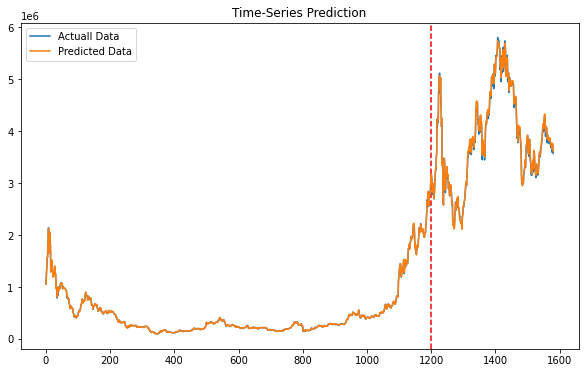

In [49]:
train_predict = lstm_model(df_X_std.to(device))#forward pass
data_predict = train_predict.data.detach().cpu().numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mmsc.inverse_transform(data_predict) #reverse transformation
dataY_plot = mmsc.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=1200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [ ]:
#####################################################
####################################################

In [50]:
#배치 정규화가 포함된 네트워크
#먼저 정규화되지 않은(unregularized) 네트워크를 교육한 후 드롭아웃을 통해 정규화된 네트워크를 교육

class BnLSTM1(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(BnLSTM1, self).__init__()
    self.num_classes = num_classes #number of classes #클래스 개수
    self.num_layers = num_layers #number of layers #LSTM 계층의 개수
    self.input_size = input_size #input size #입력 크기로 훈련 데이터셋의 칼럼 개수를 의미
    self.hidden_size = hidden_size #hidden state #은닉층의 뉴런 개수
    self.seq_length = seq_length #sequence length #시퀀스 길이
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm 계층
    self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1 #완전연결층
    self.fc = nn.Linear(128, num_classes) #fully connected last layer #출력층

    self.relu = nn.ReLU() 

############
    self.dropout = nn.Dropout(0.25) #드롭아웃을 추가 #(뉴런이 비활성화될 확률인 드롭아웃 비율)을 매개 변수로 사용하는 torch.nn.Dropout 클래스

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #은닉 상태를 0으로 초기화
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #셀 상태를 0으로 초기화
    # Propagate input through LSTM

    #x = self.dropout(x)
    #x = self.fc2(x)

    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state #LSTM 계층에 은식 상태와 셀 상태 적용
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next #완전연결층 적용을 위해 데이터의 형태 조정(1차원으로 조정)
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output

    
   
    return out 

#배치 정규화는 네트워크에 포함시킨다
#배치 정규화는 완전연결층과 합성곱층 뒤, 활성화 함수 앞에 위치한다

#배치 정규화를 사용하는 이유는 은닉층에서 학습이 진행될때마다 입력 분포가 변하면서 가중치가 엉뚱한 방향으로 갱신되는 문제가 종종 발생하기 때문 
#즉, 신경망의 층이 깊어질수록 학습할 때 가정했던 입력 분포가 변화하여 엉뚱한 학습이 진행될 수 있는데 
#배치 정규화를 적용해서 입력 분포를 고르게 맞추어 줄 수 있음


#드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적

In [51]:
#네트워크 파라미터 구성하기 

num_epochs = 16000 #에포크 수
learning_rate = 0.00001 #학습률 지정

input_size = 4 #number of features #수정하면서 하기 #입력 데이터셋의 칼럼(feature)개수
hidden_size = 100 #number of features in hidden state #은닉층의 뉴런/유닛 개수
num_layers = 1 #number of stacked lstm layers #LSTM 계층의 개수

num_classes = 1 #number of output classes #클래스 개수

# 각 수 조정에 대해 공부해보기

In [52]:
lstm_model2 = BnLSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]).to(device)

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
#criterion

optimizer = torch.optim.Adam(lstm_model2.parameters(), lr=learning_rate)  # adam optimizer

In [53]:
for epoch in range(num_epochs):
  outputs = lstm_model2.forward(X_train_tensors_final.to(device)) #전방향 학습
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = loss_function(outputs, y_train_tensors.to(device))
  #손실함수를 이용한 오차 계산(모델 학습 결과(outputs)와 레이블(y_train_tensors)의 차이 계산)

  loss.backward() #calculates the loss of the loss function #기울기 계산
 
  optimizer.step() #improve from loss, i.e backprop #오차 업데이트
  if epoch % 100 == 0: #에포크를 100으로 나누어 나머지가 0이면 출력
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 


Epoch: 0, loss: 0.01188
Epoch: 100, loss: 0.01073
Epoch: 200, loss: 0.00986
Epoch: 300, loss: 0.00917
Epoch: 400, loss: 0.00859
Epoch: 500, loss: 0.00807
Epoch: 600, loss: 0.00758
Epoch: 700, loss: 0.00710
Epoch: 800, loss: 0.00662
Epoch: 900, loss: 0.00614
Epoch: 1000, loss: 0.00565
Epoch: 1100, loss: 0.00515
Epoch: 1200, loss: 0.00464
Epoch: 1300, loss: 0.00413
Epoch: 1400, loss: 0.00363
Epoch: 1500, loss: 0.00314
Epoch: 1600, loss: 0.00266
Epoch: 1700, loss: 0.00221
Epoch: 1800, loss: 0.00180
Epoch: 1900, loss: 0.00144
Epoch: 2000, loss: 0.00112
Epoch: 2100, loss: 0.00085
Epoch: 2200, loss: 0.00062
Epoch: 2300, loss: 0.00044
Epoch: 2400, loss: 0.00031
Epoch: 2500, loss: 0.00021
Epoch: 2600, loss: 0.00014
Epoch: 2700, loss: 0.00009
Epoch: 2800, loss: 0.00006
Epoch: 2900, loss: 0.00004
Epoch: 3000, loss: 0.00003
Epoch: 3100, loss: 0.00003
Epoch: 3200, loss: 0.00002
Epoch: 3300, loss: 0.00002
Epoch: 3400, loss: 0.00002
Epoch: 3500, loss: 0.00002
Epoch: 3600, loss: 0.00002
Epoch: 3700, 

In [54]:
#예측하기

df_X_std = stdsc.transform(df_ETH)

df_y_mm = mmsc.transform(df_ETH.iloc[:, 3:4])

df_X_std = Variable(torch.Tensor(df_X_std)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))

#reshaping the dataset
df_X_std = torch.reshape(df_X_std, (df_X_std.shape[0], 1, df_X_std.shape[1]))

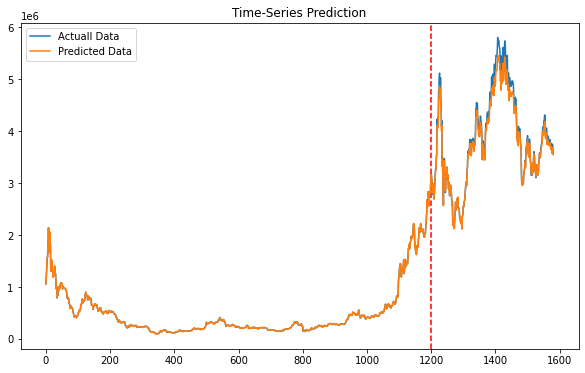

In [55]:
train_predict = lstm_model2(df_X_std.to(device))#forward pass
data_predict = train_predict.data.detach().cpu().numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mmsc.inverse_transform(data_predict) #reverse transformation
dataY_plot = mmsc.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=1200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 